In [1]:
# Importing libraries
import nasdaqdatalink
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [3]:
nasdaqdatalink.ApiConfig.api_key = '4esb635oAoomCLyyTVns'
nasdaqdatalink.get_table('ZILLOW/DATA')

C:\Users\nickr\anaconda3\Lib\site-packages\nasdaqdatalink\get_table.py:38: UserWarning: To request more pages, please set paginate=True in your         nasdaqdatalink.get_table() call. For more information see our documentation:         https://github.com/Nasdaq/data-link-python/blob/main/FOR_ANALYSTS.md#things-to-note
  warnings.warn(Message.WARN_PAGE_LIMIT_EXCEEDED, UserWarning)


indicator_id region_id       date          value
None                                                 
0            ZSFH     99999 2024-07-31  486230.166077
1            ZSFH     99999 2024-06-30  485893.210056
2            ZSFH     99999 2024-05-31  484599.091201
3            ZSFH     99999 2024-04-30  481777.608669
4            ZSFH     99999 2024-03-31  480423.651093
...           ...       ...        ...            ...
9995         ZSFH     99959 2017-04-30  327998.635842
9996         ZSFH     99959 2017-03-31  324828.631501
9997         ZSFH     99959 2017-02-28  321684.047119
9998         ZSFH     99959 2017-01-31  318551.305596
9999         ZSFH     99959 2016-12-31  315427.251855

[10000 rows x 4 columns]

In [5]:
# Importing Zillow Data
df = nasdaqdatalink.get_table('ZILLOW/DATA')

C:\Users\nickr\anaconda3\Lib\site-packages\nasdaqdatalink\get_table.py:38: UserWarning: To request more pages, please set paginate=True in your         nasdaqdatalink.get_table() call. For more information see our documentation:         https://github.com/Nasdaq/data-link-python/blob/main/FOR_ANALYSTS.md#things-to-note
  warnings.warn(Message.WARN_PAGE_LIMIT_EXCEEDED, UserWarning)


In [7]:
df.head()

indicator_id region_id       date          value
None                                                 
0            ZSFH     99999 2024-07-31  486230.166077
1            ZSFH     99999 2024-06-30  485893.210056
2            ZSFH     99999 2024-05-31  484599.091201
3            ZSFH     99999 2024-04-30  481777.608669
4            ZSFH     99999 2024-03-31  480423.651093

In [44]:
# Aggregating data based on monthly average
df['date'] = pd.to_datetime(df['date'])
df_grouped = df.groupby(df['date'].dt.to_period('M')).agg({'value': 'mean'}).reset_index()
df_grouped['date'] = df_grouped['date'].astype(str)

KeyError: 'date'

In [ ]:
print(df_grouped)

In [13]:
df_grouped.shape

(343, 2)

In [15]:
type(df_grouped)

pandas.core.frame.DataFrame

In [21]:
df_grouped = df_grouped.asfreq('MS')

In [23]:
df_grouped.isnull()

date  value
1970-01-01  True   True

In [25]:
# Filling missing data
df_grouped = df_grouped.fillna(0)

C:\Users\nickr\AppData\Local\Temp\ipykernel_10416\1985597256.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_grouped = df_grouped.fillna(0)


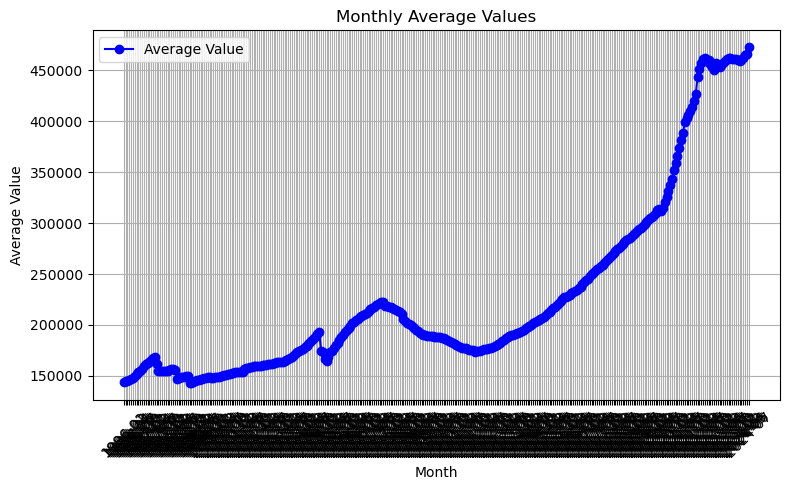

In [17]:
# Graphing values
dates = df_grouped['date'].astype(str) # Convert date to string for plotting
values = df_grouped['value'].to_numpy() # Convert values to NumPy array
plt.figure(figsize=(8, 5))
plt.plot(dates, values, marker='o', linestyle='-', color='b', label='Average Value')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.title('Monthly Average Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [27]:
# Setting date column as the index
df_grouped.set_index('date', inplace=True)

In [29]:
decomposition = sm.tsa.seasonal_decompose(df_grouped, model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None